# English Wikipedia page views, 2008 - 2017
```
Implementated by Deepa Agrawal
deepa15@uw.edu
Oct 2017
```
### Data Curation Assignment:
This assignment involves the following steps:
* analyze traffic on English Wikipedia over time
* document the process and the resulting dataset
* visualize according to best practices for open research that were outlined in class.

### References:    
* [Legacy Pagecounts API](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Legacy_Pagecounts)
* [pageview API](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews)
* https://wiki.communitydata.cc/HCDS_(Fall_2017)/Assignments

In [27]:
# import the required libraries
import requests
import csv
import pandas as pd
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1: Data acquisition

#### Setting API endpoints for the Pagecounts API and the Pageviews API:

In [28]:
count_endpoint = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access}/{granularity}/{start}/{end}'
view_endpoint = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

#### Parameters to make the 'Pagecount' API calls

In [29]:
params_counts_allsites = {'project' : 'en.wikipedia.org',
            'access' : 'all-sites',
            'granularity' : 'monthly',
            'start' : '2008010100',
            'end' : '2016070100'
            }

params_counts_mobilesites = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-site',
            'granularity' : 'monthly',
            'start' : '2008010100',
            'end' : '2016070100'
            }
    
params_counts_desktopsites = {'project' : 'en.wikipedia.org',
            'access' : 'desktop-site',
            'granularity' : 'monthly',
            'start' : '2008010100',
            'end' : '2016070100'
            }

#### Parameters to make the 'Pageview' API calls

In [30]:
params_views_desktop = {'project' : 'en.wikipedia.org',
            'access' : 'desktop',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017090100'
            }

params_views_mobileweb = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-web',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017090100'
            }

params_views_mobileapp = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-app',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017090100'
            }


#### Pagecount API calls to get mobile, desktop and both Wikipedia traffic data. The output is json file which is saved on disk.

In [31]:
api_call = requests.get(count_endpoint.format(**params_counts_allsites))
response_counts_allsites =api_call.json()
with open('pagecounts_all-sites_200801-201607.json', 'w') as f:
    json.dump(response_counts_allsites, f)
    
api_call = requests.get(count_endpoint.format(**params_counts_mobilesites))
response_counts_mobilesite = api_call.json()
with open('pagecounts_mobile-site_200801-201607.json', 'w') as f:
    json.dump(response_counts_mobilesite, f)


api_call = requests.get(count_endpoint.format(**params_counts_desktopsites))
response_counts_desktopsite = api_call.json()
with open('pagecounts_desktop-site_200801-201607.json', 'w') as f:
    json.dump(response_counts_desktopsite, f)

#### Pageview API calls to get mobile, desktop and both Wikipedia traffic data. The output is json file which is saved on disk.

In [32]:
api_call = requests.get(view_endpoint.format(**params_views_desktop))
response_views_desktop = api_call.json()
with open('pageviews_all-sites_201507-201709.json', 'w') as f:
    json.dump(response_views_desktop, f)
    
api_call = requests.get(view_endpoint.format(**params_views_mobileweb))
response_views_mobileweb = api_call.json()
with open('pageviews_mobile-web_201507-201709.json', 'w') as f:
    json.dump(response_views_mobileweb, f)

api_call = requests.get(view_endpoint.format(**params_views_mobileapp))
response_views_mobileapp = api_call.json()
with open('pageviews_mobile-app_201507-201709.json', 'w') as f:
    json.dump(response_views_mobileapp, f)

## Step 2: Data Processing

In [33]:
# get items and convert the responses into dataframes. This is required in for loop to get the length of the file
resp_count_df1 = pd.DataFrame(response_counts_allsites['items'])
resp_count_df2 = pd.DataFrame(response_counts_mobilesite['items'])
resp_count_df3 = pd.DataFrame(response_counts_desktopsite['items'])

# get items and convert the responses into dictionary to access individual objects
resp_count_dict1 = response_counts_allsites['items']
resp_count_dict2 = response_counts_mobilesite['items']
resp_count_dict3 = response_counts_desktopsite['items']

# create empty list
resp_count_all_view = []
resp_count_time = []
resp_count_mobile_view = []
resp_count_desktop_view = []

#load data from responses into the list. Used a single for loop to load mobile, desktop and both data 
for x in range(0,len(resp_count_df1)):
    resp_count_all_view.append(resp_count_dict1[x]['count'])
    resp_count_time.append(resp_count_dict1[x]['timestamp'])
    resp_count_desktop_view.append(resp_count_dict3[x]['count'])
    resp_count_mobile_view.append(resp_count_dict1[x]['count']-resp_count_dict3[x]['count'])
   
# wtite the list in a single dataframe
pagecount = pd.DataFrame(
    {'Date':resp_count_time,
     'pagecount_all_views': resp_count_all_view,
     'pagecount_desktop_views': resp_count_desktop_view,
     'pagecount_mobile_views': resp_count_mobile_view
    })    

#### Perform the same data processing steps as above on page views

In [34]:
# get items and convert the responses into dataframes. This is required in for loop to get the length of the file
resp_view_df1 = pd.DataFrame(response_views_desktop['items'])
resp_view_df2 = pd.DataFrame(response_views_mobileweb['items'])
resp_view_df3 = pd.DataFrame(response_views_mobileapp['items'])

# get items and convert the responses into dictionary to access individual objects
resp_view_dict1 = response_views_desktop['items']
resp_view_dict2 = response_views_mobileweb['items']
resp_view_dict3 = response_views_mobileapp['items']

# create empty list
resp_view_desktop = []
resp_view_time = []
resp_view_mobile = []
resp_view_all = []

#load data from responses into the list. Used a single for loop to load mobile, desktop and both data 
for x in range(0,len(resp_view_df1)):
    resp_view_desktop.append(resp_view_dict1[x]['views'])
    resp_view_time.append(resp_view_dict1[x]['timestamp'])
    resp_view_mobile.append(resp_view_dict2[x]['views']+resp_view_dict3[x]['views'])
    resp_view_all.append(resp_view_dict1[x]['views']+resp_view_dict2[x]['views']+resp_view_dict3[x]['views'])
    
# write the list in a single dataframe    
pageview = pd.DataFrame(
    {'Date':resp_view_time,
     'pageview_all_views': resp_view_all,
     'pageview_desktop_views': resp_view_desktop,
     'pageview_mobile_views': resp_view_mobile
    })    

#### Merge pagecount and pageview in a single dataframe 

In [35]:
final_csv_df = pagecount.merge(pageview, left_on='Date', right_on='Date', how='outer').fillna(0)
final_csv_df['year'] = final_csv_df['Date'].str[0:4]
final_csv_df['month'] = final_csv_df['Date'].str[4:6]
final_csv_df['timestamp'] = final_csv_df['Date'].str[0:8]
final_csv_df['timestamp'] = final_csv_df['timestamp'].apply(pd.to_datetime)
final_csv_df = final_csv_df[['year', 'month', 'timestamp','pagecount_all_views', 'pagecount_desktop_views', 
'pagecount_mobile_views','pageview_all_views','pageview_desktop_views','pageview_mobile_views']]

#### Write the merged dataframe to a csv file

In [36]:
final_csv_df.to_csv('en-wikipedia_traffic_200801-201709.csv', sep=',')

## Step 3: Analysis

#### Visualize Wikipedia traffic with 3 metrics
* mobile traffic(for counts and views)
* desktop traffic(for counts and views)
* all traffic (mobile + desktop)

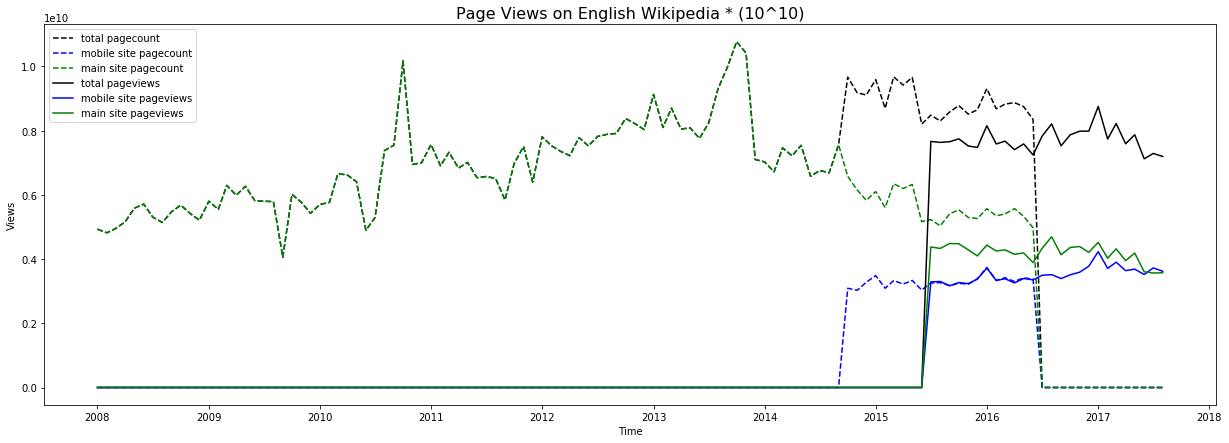

In [37]:
# Create the plot
fig, ax = plt.subplots(figsize=(21,7))
ax.plot_date(final_csv_df['timestamp'], final_csv_df['pagecount_all_views'], '--', color='black', label='total pagecount')
ax.plot_date(final_csv_df['timestamp'], final_csv_df['pagecount_mobile_views'], '--', color='blue', label='mobile site pagecount')
ax.plot_date(final_csv_df['timestamp'], final_csv_df['pagecount_desktop_views'], '--',color='green', label = 'main site pagecount')

ax.plot_date(final_csv_df['timestamp'], final_csv_df['pageview_all_views'], '-', color='black', label='total pageviews')
ax.plot_date(final_csv_df['timestamp'], final_csv_df['pageview_mobile_views'], '-', color='blue', label='mobile site pageviews' )
ax.plot_date(final_csv_df['timestamp'], final_csv_df['pageview_desktop_views'], '-',color='green', label='main site pageviews')

plt.title('Page Views on English Wikipedia * (10^10)', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Views')
ax.legend(loc='upper left')

#### Save the visualization as a png image

In [38]:
fig.savefig('PlotPageviewsEN_overlap.png')